<a href="https://colab.research.google.com/github/AarnoStormborn/Tensorflow-Developer-Certification/blob/main/01_tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Regression with Neural Networks

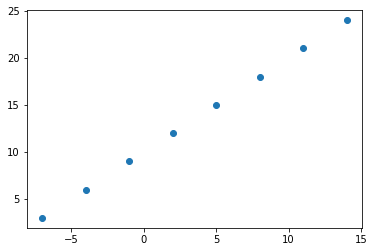

In [ ]:
# Creating a dataset 
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np. array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Steps in modelling with tf
* **Creating a model** - input and ouput layers with hidden layers
* **Compiling a model** - Loss function and Optimizers
* **Fitting a model** - letting the model try to find patterns

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 508ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Another way

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
X.dtype, y.dtype

(tf.float64, tf.float64)

In [ ]:
# Make a prediction using our model

model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improving our model

In [ ]:
# creating a better model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae']
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 358ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7126 - mae: 7.7126
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4266 - mae: 13.4266
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7267 - mae: 10.7267
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 5.9640 - mae: 5.9640
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3730 - mae: 8.3730
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2446 - mae: 9.2446
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4631 - mae: 8.4631
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.6290 - mae: 6.6290
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 3.9859 - mae: 3.9859
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

In [ ]:
model.predict([17.0])

array([[28.078846]], dtype=float32)

In [ ]:
# Create a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

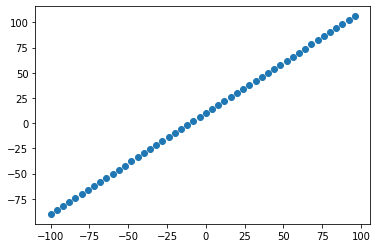

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets
* Training : 70-80%
* Validation : 10-15%
* Testing : 10-15%

In [ ]:
X_train = X[:40]
X_test = X[40:] 
y_train = y[:40]
y_test = y[40:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

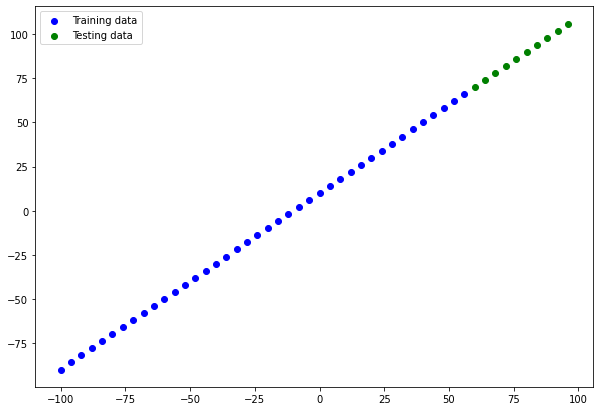

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend()
plt.show()

In [ ]:
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
X.shape, y.shape

(TensorShape([50]), TensorShape([50]))

In [ ]:
# Define an input_shape

tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation=None, name='Hidden_layer_1'))
model.add(tf.keras.layers.Dense(50, activation=None, name='Hidden_layer_2'))
model.add(tf.keras.layers.Dense(1, activation=None, name='output_layer'))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [ ]:
# Fitting the model

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 10)                20        
                                                                 
 Hidden_layer_2 (Dense)      (None, 50)                550       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters
* Trainable parameters - These are the learned parameters
* Non-Trainable parameters - Aren't updated during learning, because of transfer learning

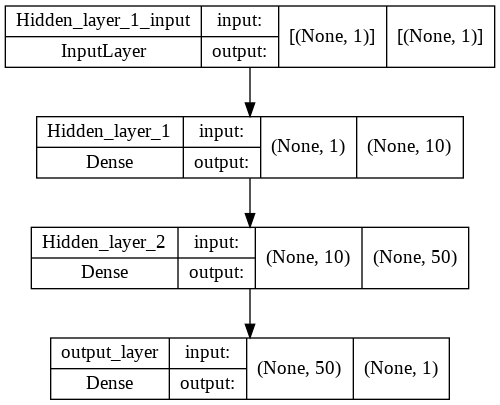

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 69.34253 ],
       [ 73.29599 ],
       [ 77.24945 ],
       [ 81.202896],
       [ 85.15635 ],
       [ 89.1098  ],
       [ 93.06327 ],
       [ 97.01672 ],
       [100.97018 ],
       [104.92363 ]], dtype=float32)

In [ ]:
# Plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c='b', label='Training Data')
    plt.scatter(test_data,test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

    plt.show()

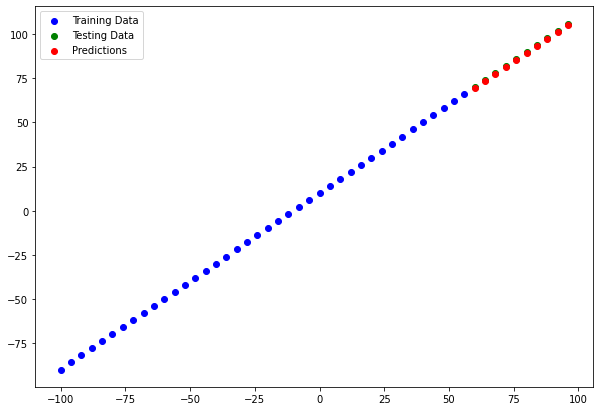

In [ ]:
plot_pred()

### Evaluation of the Model with regression metrics

* Mean Absolute Error
* Mean Squared Error

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 235ms/step - loss: 0.8669 - mae: 0.8669


[0.8669158816337585, 0.8669158816337585]

In [ ]:
y_pred = tf.constant(tf.squeeze(y_pred))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.8669182>

In [ ]:
mae1 = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae1

<tf.Tensor: shape=(), dtype=float32, numpy=0.8669182>

In [ ]:
y_test.shape, y_pred.shape

(TensorShape([10]), TensorShape([10]))

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.7694199>

In [ ]:
mse1 = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse1

<tf.Tensor: shape=(), dtype=float32, numpy=0.7694199>

In [ ]:
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve model
* Get more data - more samples
* Make your model larger
* Train for longer

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Experiments-
1. `model_1` 1 layer 100 epochs
2. `model_2` 2 layer 100 epochs (3,1) nodes
3. `model_3` 2 layer 500 epochs (3,1)

#### Model 1

In [ ]:
tf.random.set_seed(1)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 87.2448 - mae: 87.2448
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 52.9342 - mae: 52.9342
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 18.8508 - mae: 18.8508
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 15.8687 - mae: 15.8687
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5717 - mae: 12.5717
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 20.1515 - mae: 20.1515
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3337 - mae: 12.3337
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6092 - mae: 10.6092
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2316 - mae: 10.2316
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 8.8841 - mae: 8.8841
Epoch 11/100
2/2 [==============================] - 0s 4ms/

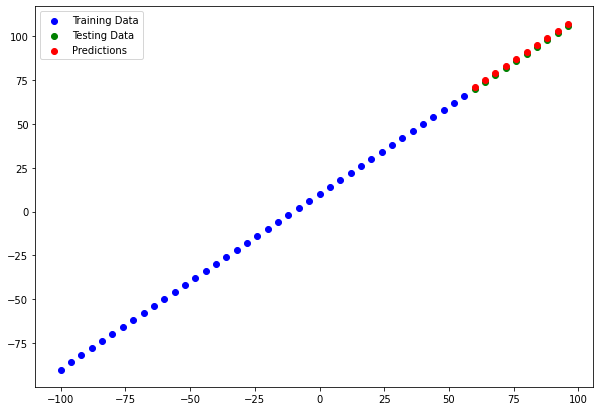

In [ ]:
# Predict and Plot
y_pred1 = model_1.predict(y_test)
plot_pred(predictions=y_pred1)

In [ ]:
y_pred1

array([[ 71.186646],
       [ 75.18156 ],
       [ 79.176476],
       [ 83.17139 ],
       [ 87.166306],
       [ 91.16122 ],
       [ 95.156136],
       [ 99.151054],
       [103.145966],
       [107.140884]], dtype=float32)

In [ ]:
mae1 = mae(y_test, y_pred1)
mse1 = mse(y_test, y_pred1)
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.1637627>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3545568>)

#### Model 2

In [ ]:
tf.random.set_seed(1)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 45.3979 - mae: 45.3979
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 17.0609 - mae: 17.0609
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7.9714 - mae: 7.9714
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 39.0158 - mae: 39.0158
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 22.7413 - mae: 22.7413
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 26.5404 - mae: 26.5404
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7465 - mae: 13.7465
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1205 - mae: 11.1205
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3578 - mae: 9.3578
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6660 - mae: 9.6660
Epoch 11/100
2/2 [==============================] - 0s 4ms/step -

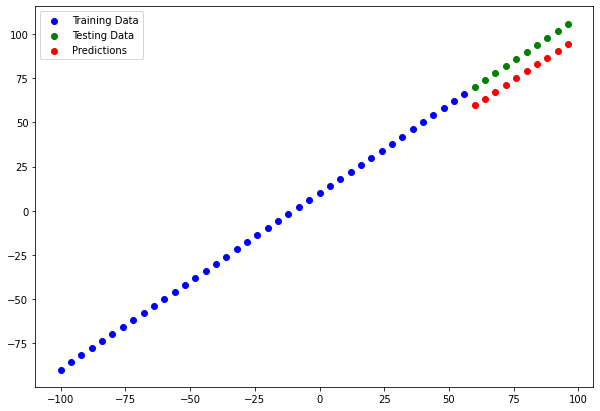

In [ ]:
y_pred2 = model_2.predict(X_test)
plot_pred(predictions=y_pred2)

In [ ]:
mae2 = mae(y_test, y_pred2)
mse2 = mse(y_test, y_pred2)
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.970955>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.50609>)

#### Model 3

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 68.0677 - mae: 68.0677
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 38.9598 - mae: 38.9598
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 20.0227 - mae: 20.0227
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 32.0857 - mae: 32.0857
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 18.8065 - mae: 18.8065
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 23.6768 - mae: 23.6768
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 13.0611 - mae: 13.0611
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 12.4449 - mae: 12.4449
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 10.4081 - mae: 10.4081
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 9.4260 - mae: 9.4260
Epoch 11/500
2/2 [==============================] - 0s 18ms

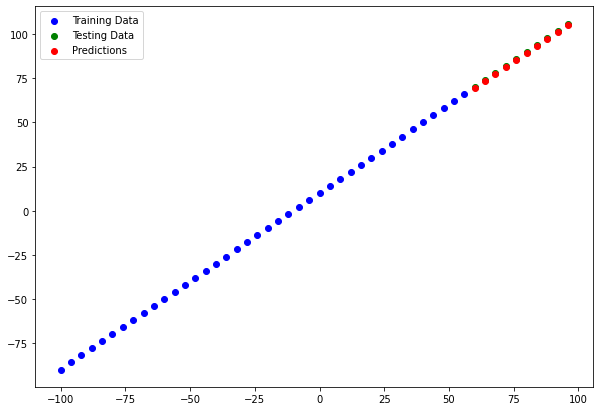

In [ ]:
y_pred3 = model_3.predict(X_test)
plot_pred(predictions=y_pred)

In [ ]:
mae3 = mae(y_test, y_pred3)
mse3 = mse(y_test, y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=15.396741>,
 <tf.Tensor: shape=(), dtype=float32, numpy=239.88412>)

### Compare the results

In [ ]:
# Pandas Dataframe

import pandas as pd
model_results = [['model 1', mae1.numpy(), mse1.numpy()],
                 ['model 2', mae2.numpy(), mse2.numpy()],
                 ['model_3', mae3.numpy(), mse3.numpy()]]
results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
results

,model,mae,mse
0,model 1,1.163763,1.354557
1,model 2,10.970955,120.506088
2,model_3,15.396741,239.884125


### Tracking your experiments

**Resources**:
1. Tensorboard
2. Weights & Biases - A tool to track experiments

## Saving A Deep Learning Model

Two ways to save a model:
* SavedModel format
* HDF5 format

In [ ]:
model_1.save('best_model')

In [ ]:
model_1.save('best_model.h5')

## Loading a Deep Learning Model

In [ ]:
# SavedModel

load_model = tf.keras.models.load_model('/content/best_model')
load_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred11 = model_1.predict(X_test)
load_model_preds = load_model.predict(X_test)

In [ ]:
load_model_preds == y_pred11

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
load_model_preds.shape == y_pred11.shape

True

In [ ]:
load_model_preds.squeeze() == y_pred11.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
y_pred11.squeeze().shape, y_pred11.shape, y_pred11.flatten().shape # flatten here is numpy function

((10,), (10, 1), (10,))

In [ ]:
load_model_preds.squeeze(), y_pred11.squeeze()

(array([61.199352, 65.19427 , 69.189186, 73.184105, 77.179016, 81.173935,
        85.168846, 89.163765, 93.158676, 97.153595], dtype=float32),
 array([61.199352, 65.19427 , 69.189186, 73.184105, 77.179016, 81.173935,
        85.168846, 89.163765, 93.158676, 97.153595], dtype=float32))

In [ ]:
mae4 = mae(y_test, load_model_preds)
mse4 = mse(y_test, load_model_preds)

In [ ]:
# HDF5 model

loadh5 = tf.keras.models.load_model('/content/best_model.h5')
loadh5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred12 = model_1.predict(X_test)
loadh5_preds = loadh5.predict(X_test)

In [ ]:
loadh5_preds == y_pred12

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loadh5_preds.shape == y_pred12.shape

True

In [ ]:
loadh5_preds.squeeze(), y_pred12.squeeze()

(array([61.199352, 65.19427 , 69.189186, 73.184105, 77.179016, 81.173935,
        85.168846, 89.163765, 93.158676, 97.153595], dtype=float32),
 array([61.199352, 65.19427 , 69.189186, 73.184105, 77.179016, 81.173935,
        85.168846, 89.163765, 93.158676, 97.153595], dtype=float32))

## Download the Model to local machine

* `files` -> `right click on file` -> `download`
* Code
* Save it to Google Drive

In [ ]:
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Google Drive
!cp /content/best_model.h5 /content/drive/MyDrive/tf_model

In [ ]:
!ls /content/drive/MyDrive/tf_model

best_model.h5


# Putting together what we've learned

In [ ]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data with Pandas
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
print(f'Number of samples: {data.shape[0]}\nNumber of Features: {data.shape[1]-1}\nTarget: {1}')

Number of samples: 1338
Number of Features: 6
Target: 1


In [ ]:
df_data = pd.get_dummies(data)

In [ ]:
df_data.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [ ]:
# Create Features and labels
X = df_data.drop(['charges'], axis=1)
y = df_data['charges']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
# Build a Neural Network model
tf.random.set_seed(1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13182.9092 - mae: 13182.9092
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13048.0000 - mae: 13048.0000
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12756.7881 - mae: 12756.7881
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12171.5371 - mae: 12171.5371
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11153.4941 - mae: 11153.4941
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9753.7598 - mae: 9753.7598
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8412.9658 - mae: 8412.9658
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7677.1426 - mae: 7677.1426
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7501.1523 - mae: 7501.1523
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7469.9746 - mae:

In [ ]:
y_pred = model.predict(X_test)
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred)).numpy()

3612.983

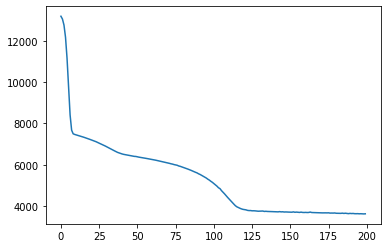

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df['mae'])
plt.show()

## Preprocessing - Normalization and Standardization

Neural Networks prefer **Normalization**
> Normalization: Scale values to a range of 0 to 1. <br>
> Standardization: Brings the data to a normal distribution (affects outliers)

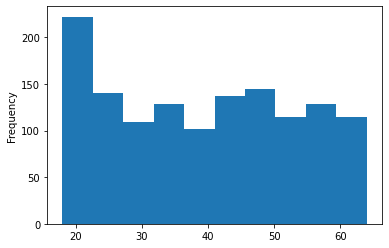

In [ ]:
X['age'].plot(kind='hist')

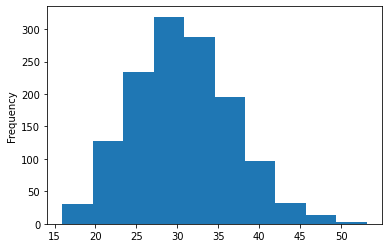

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Features and Label
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Fit column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# Transform the columns
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.76086957, 0.28625235, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_test_normal[0]

array([0.02173913, 0.52649987, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### Build another model for our new data

In [ ]:
tf.random.set_seed(1)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13228.7871 - mae: 13228.7871
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13222.6348 - mae: 13222.6348
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13205.8496 - mae: 13205.8496
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13168.3232 - mae: 13168.3232
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13098.9189 - mae: 13098.9189
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12986.2510 - mae: 12986.2510
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12819.8486 - mae: 12819.8486
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12589.3418 - mae: 12589.3418
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12284.2598 - mae: 12284.2598
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11897.05

In [ ]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3348.2625 - mae: 3348.2625


[3348.262451171875, 3348.262451171875]

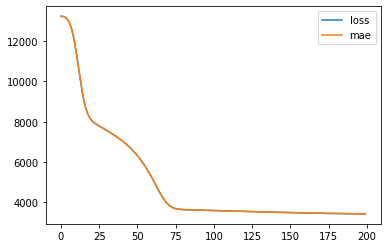

In [ ]:
pd.DataFrame(history.history).plot()